The **Wigner function** is a quasi-probability distribution used in quantum mechanics to represent quantum states in phase space [1] .  It provides a way to visualize quantum states in terms of both position $(x) $and momentum $(p)$ 
The Wigner function $W(x, p)$ is defined for a quantum state described by a wavefunction $ \psi(x)$  or a density matrix $\rho $. for a pure state with wavefunction $\psi(x)$, the Wigner function is given by:

$
W(x, p) = \frac{1}{\pi \hbar} \int_{-\infty}^\infty dy \, \psi^*\!\left(x - \frac{y}{2}\right) \psi\!\left(x + \frac{y}{2}\right) e^{i p y / \hbar}.
$

for a mixed state described by a density matrix $\rho$, the Wigner function is:

$
W(x, p) = \frac{1}{\pi \hbar} \int_{-\infty}^\infty dy \, \langle x - \frac{y}{2} | \rho | x + \frac{y}{2} \rangle e^{i p y / \hbar}.
$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from math import factorial, pi
from mpl_toolkits.mplot3d import Axes3D 

### Parameters
- `n`: The Fock state $(|n\rangle)$ to visualize  $(|0\rangle, |1\rangle, |2\rangle$, etc.)
- `grid_size`: The resolution of the Wigner function grid
- `xvec`, `pvec`: Position and momentum space grids
- `hbar`: Reduced Planck constant (set to 1 for simplicity)

In [16]:
n = 0  
grid_size = 100  
xvec = np.linspace(-5, 5, grid_size)  
pvec = np.linspace(-5, 5, grid_size)  
hbar = 1  

### Functions

1. **`fock_state_wavefunction(x, n)`**:
   - Computes the wavefunction of a Fock state $|n\rangle$ in position space
   - I use the Hermite polynomial from `scipy.special`.

In [17]:
def fock_state_wavefunction(x, n):
    return (1 / np.sqrt(2**n * factorial(n) * (pi)**0.25) * np.exp(-x**2 / 2) * hermite(n)(x))

2. **`calculate_wigner(psi, xvec, pvec, hbar=1)`**:
   - Calculates the Wigner function for a given wavefunction $\psi(x)$



In [18]:
def calculate_wigner(psi, xvec, pvec, hbar=1):
    W = np.zeros((len(pvec), len(xvec)), dtype=complex)
    dx = xvec[1] - xvec[0]  

    for i, x in enumerate(xvec):
        for j, p in enumerate(pvec):
            y = np.linspace(-10, 10, grid_size)  # integration variable y
            integrand = psi(x - y / 2) * np.conj(psi(x + y / 2)) * np.exp(1j * p * y / hbar)
            W[j, i] = np.trapezoid(integrand, y)  
    W = np.real(W) / (np.pi * hbar)  #normalize
    return W

**`the wavefunction for the Fock state |n⟩`**:

In [19]:
psi = lambda x: fock_state_wavefunction(x, n)

**`Wigner function final result`**:

In [20]:
W = calculate_wigner(psi, xvec, pvec)

Text(0.5, 1.0, 'Custom Wigner Function for Fock State |0⟩')

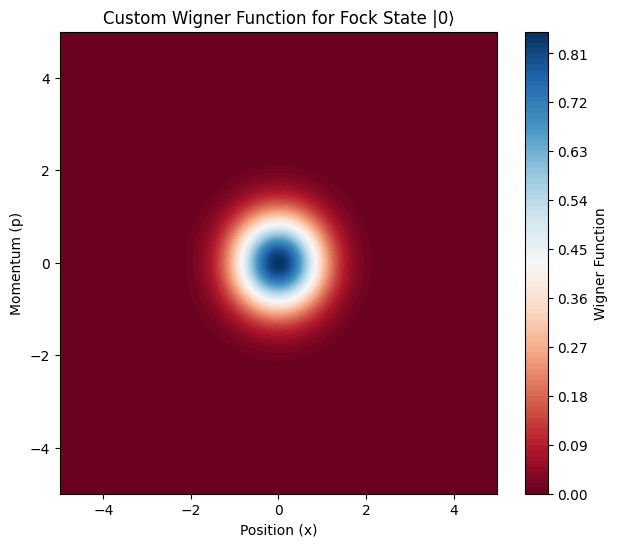

In [21]:
X, Y = np.meshgrid(xvec, pvec)

plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
plt.contourf(X, Y, W, levels=100, cmap='RdBu')
plt.colorbar(label="Wigner Function")
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.title(f"Custom Wigner Function for Fock State |{n}⟩")

NameError: name 'fig' is not defined

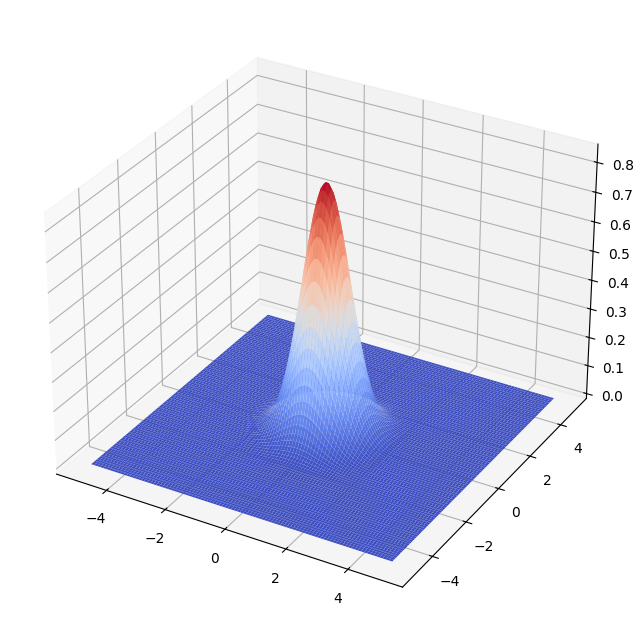

In [22]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, W, cmap='coolwarm', rstride=1, cstride=1, linewidth=0, antialiased=True)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label="Wigner Function")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Momentum (p)")
ax.set_zlabel("Wigner Function")
ax.set_title(f"3D Wigner Function for Fock State |{n}⟩")

plt.tight_layout()
plt.show()